# Figure 2 word cloud

This script is used to generate word cloud fin Figure 2.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
# Load the Excel file
file_path = '../source_data/marcwordcloud_dataset.xlsx'
df = pd.read_excel(file_path, usecols=[0, 1, 4])
df.columns = ['Word', 'Score', 'Cluster']

Removed uninformative words using three categories (see code for specifics):
(1) General words (e.g., signal, life, response)
(2) Structural words (e.g., protein, gene, domain)
(3) Redundant modifiers (e.g., external, rich, repeat)

In [31]:
# Define meaningless words
too_general = [
    'life', 'signal', 'mediated', 'absence', 'origin', 'activity', 
    'stimulus', 'process', 'pattern', 'recognition', 'response', 'function', 'export'
]
structural = [
    'domain', 'family', 'factor', 'protein', 'cell', 'cells', 'gene',
    'expression', 'positive', 'type', 'like', 'receptor', 'containing', 'binding', 'component'
]
modifiers = [
    'external', 'intrinsic', 'extrinsic', 'rich', 'repeat'
]
meaningless_words = set(too_general + structural + modifiers)


# Cluster colors
cluster_colors = {
    'CSF Early Up': '#FFC6C6',
    'CSF Late Up': '#CCA9D9',
    'CSF Sustained Up': '#6B2391',
    'CSF Late Up Early Down': '#F5C3A0'
}

# Filter data
df_filtered = df[df['Cluster'].isin(cluster_colors.keys())]
df_filtered = df_filtered[~df_filtered['Word'].str.lower().isin(meaningless_words)]

# Normalize scores within each cluster
df_filtered['Normalized_Score'] = df_filtered.groupby('Cluster')['Score'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) + 0.1
)

In [32]:
df_filtered.loc[df_filtered.groupby("Cluster")["Normalized_Score"].idxmax(), ["Cluster", "Word", "Normalized_Score"]].reset_index(drop=True)

,Cluster,Word,Normalized_Score
0,CSF Early Up,pyrimidine,1.1
1,CSF Late Up,cytokine-mediated,1.1
2,CSF Late Up Early Down,cd25-positive,1.1
3,CSF Sustained Up,symbiont,1.1


Generate figure

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

font_path = "/Library/Fonts/Arial.ttf"

# Parameters
max_font_size = 70
min_font_size = 30  # You can change this
relative_scaling = 0.5

# Step 0: Filter for desired clusters
clusters_of_interest = ['CSF Early Up', 'CSF Late Up', 'CSF Sustained Up']
df_filtered[df_filtered['Cluster'].isin(clusters_of_interest)]

,Word,Score,Cluster,Normalized_Score
0,symbiont,11.247912,CSF Sustained Up,1.100000
1,virus,9.488128,CSF Sustained Up,0.923080
2,defense,8.782814,CSF Sustained Up,0.852171
3,cytokine-mediated,8.277394,CSF Sustained Up,0.801358
4,cytokine,7.998717,CSF Sustained Up,0.773341
...,...,...,...,...
247,transition,1.466959,CSF Early Up,0.600000
248,metabolic,1.466959,CSF Early Up,0.600000
249,glycoprotein,1.466959,CSF Early Up,0.600000
250,pyrimidine-containing,1.338994,CSF Early Up,0.100000


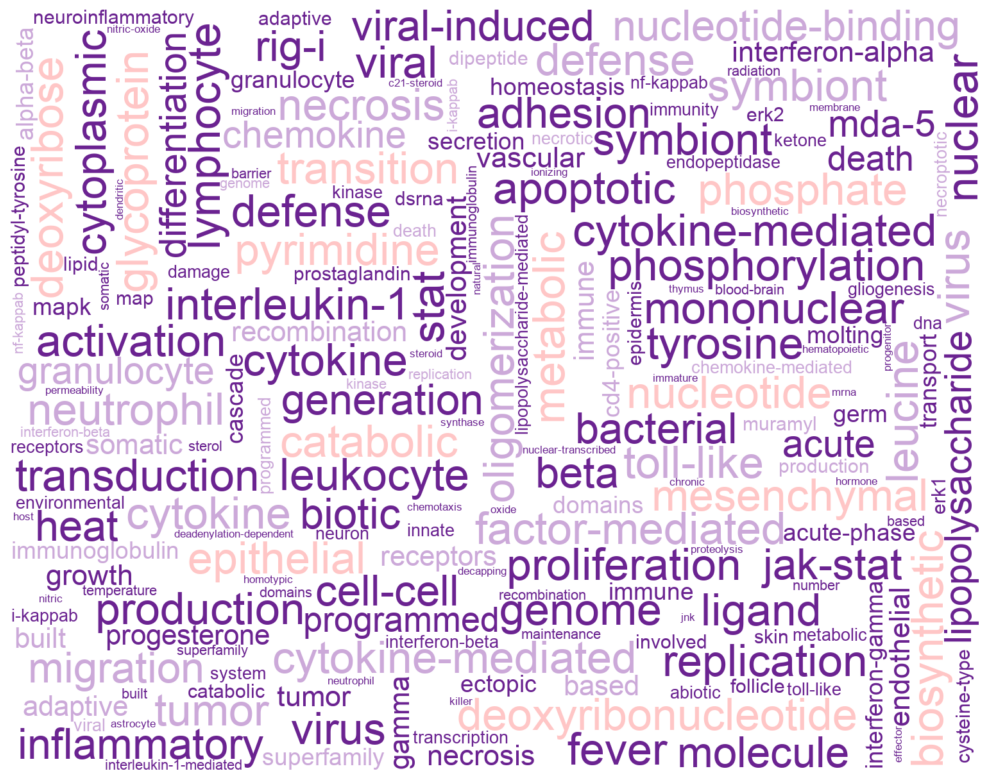

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

font_path = "/Library/Fonts/Arial.ttf"

# Parameters
max_font_size = 70
min_font_size = 30  # You can change this
relative_scaling = 0.5

# Step 0: Filter for desired clusters
# Step 0: Filter for desired clusters
clusters_of_interest = ['CSF Early Up', 'CSF Late Up', 'CSF Sustained Up']
df_filtered = df_filtered[df_filtered['Cluster'].isin(clusters_of_interest)]

# Step 1: Create minimally differentiated labels by adding spaces
def make_unique_label(word, cluster, seen):
    base = word
    while word in seen:
        word += " "  # Add space to make it unique
    seen.add(word)
    return word, cluster

seen_words = set()
unique_labels = []
for _, row in df_filtered.iterrows():
    unique_word, cluster = make_unique_label(row['Word'], row['Cluster'], seen_words)
    unique_labels.append((unique_word, row['Normalized_Score'], cluster))

# Step 2: Manually scale scores to desired font size range
scores = np.array([score for _, score, _ in unique_labels])
scaled_sizes = min_font_size + ((scores - scores.min()) / (scores.max() - scores.min())) * (max_font_size - min_font_size)

# Step 3: Prepare word-frequency and color dicts
word_frequencies = {word: size for (word, _, _), size in zip(unique_labels, scaled_sizes)}
word_colors = {word: cluster_colors[cluster] for word, _, cluster in unique_labels}

def color_func(word, *args, **kwargs):
    return word_colors.get(word, "#000000")

# Step 4: Generate WordCloud with pre-scaled frequencies
wc = WordCloud(
    width=252*6,
    height=198*6,
    background_color='white',
    font_path=font_path,
    color_func=color_func,
    max_font_size=max_font_size,
    prefer_horizontal=0.9,
    relative_scaling=0  # <-- prevent re-scaling
)
wc.generate_from_frequencies(word_frequencies)

# Save and display
wc.to_image().save("wordcloud_min_max_fontsize.png")
plt.figure(figsize=(2.52*4, 1.98*4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()